In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, f1_score)
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier, RandomForestRegressor

In [3]:
df = pd.read_csv('treino_sinais_vitais_com_label.txt', header=None,
                 usecols=[0,3, 4, 5, 6, 7])
df = df.rename(columns={0: 'linha',
                        3: 'qPA',
                        4: 'pulso',
                        5: 'resp',
                        6: 'gravid',
                        7: 'classe'})

In [5]:
#Divisao de testes e treino
x_class = df[['qPA', 'pulso', 'resp']]
y_class = df['classe']
        
xc_train, xc_test, yc_train, yc_test = train_test_split(
    x_class, y_class, test_size=0.2)

In [10]:
## Modelagem
modelo = RandomForestClassifier(max_depth=11)
modelo.fit(xc_train, yc_train)

y_class_pred = modelo.predict(xc_test)
accuracy = accuracy_score(yc_test, y_class_pred)

print('Acurácia:', accuracy)
print('F1-score: ', f1_score(yc_test, y_class_pred, average='macro'))

Acurácia: 0.9233333333333333
F1-score:  0.8939975966961078


In [11]:
# Inserir no dataframe
df['pred classif'] = modelo.predict(x_class)

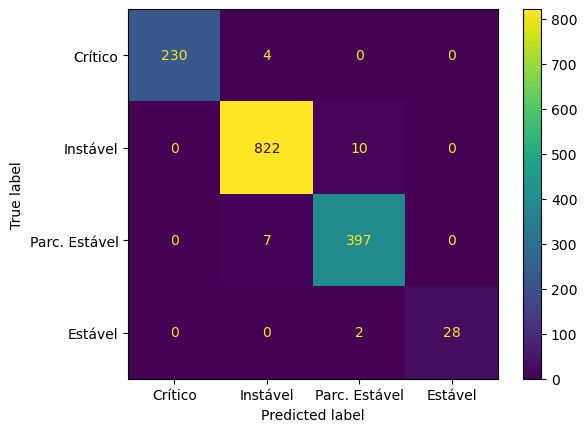

In [12]:
## Matriz de Confusão
matriz = confusion_matrix(df['classe'], df['pred classif'])

matriz_d = ConfusionMatrixDisplay(
    matriz, display_labels=['Crítico', 'Instável', 'Parc. Estável', 'Estável'])
matriz_d.plot()
plt.show()

## Regressão

In [13]:
x_reg = df[['qPA', 'pulso', 'resp']]
y_reg = df['gravid']
        
xr_train, xr_test, yr_train, yr_test = train_test_split(
    x_reg, y_reg, test_size=0.2)

In [22]:
from sklearn.metrics import (r2_score,mean_squared_error)

model_r = RandomForestRegressor(max_depth=10)
model_r.fit(xr_train, yr_train)

yr_pred = model_r.predict(xr_test)

print('R2: ', r2_score(yr_test, yr_pred))
print('MSE: ', mean_squared_error(yr_test, yr_pred))

R2:  0.9639958430753642
MSE:  10.297268532871437


In [23]:
df['pred_reg'] = modelo.predict(x_reg)

## Resposta

In [24]:
resp = df[['linha','pred classif', 'pred_reg']]
resp.to_csv('resp_arvore.csv', index=False)